# Desafio para a vaga de Cientista de dados - DOT digital group
## Candidato: Wagner Massayuki Nakasuga

### Introdução

Com uma base de dados contendo informações de alunos, serão feitas análises utilizando seus perfis para obter informações sobre as chances deles serem aprovados ou não. A base de dados possui as seguintes informações:
    
    Unnamed: em princípio, seria a identificação de cada aluno;
    Prova realizada em: local da prova;
    Dia da prova realizada em: data da prova;
    Nota: nota de 0 a 10;
    Nota da redação: nota da redação de 0 a 2,5;
    Horário da prova: período de realização da prova;
    Sexo: sexo do aluno;
    Estado civil: estado civil do aluno;
    Escolaridade: escolaridade máxima do aluno;
    Cidade de nascimento: cidade de nascimento do aluno;
    Bairro onde reside: bairro de residência do aluno.



In [1]:
# pacotes iniciais a serem utilizados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

%matplotlib inline

In [2]:
base = pd.read_csv('DOT_teste_data_science.csv', encoding = "ISO-8859-1", decimal = ',')

In [3]:
base.head()

,Unnamed: 0,prova_realizada_em,dia_da_prova_realizada,nota,nota_redacao,horario_da_prova,sexo,estado_civil,escolaridade,cidade_de_nascimento,bairro
0,0,GO - Goiás,13/01/2017,7.45,2.2,manhã,Masculino,Casado(a),Ensino médio,fortaleza,Asa Sul
1,1,GO - Goiás,10/01/2017,7.40,2.4,manhã,Masculino,Casado(a),Especialização,Recife,Norte (Águas Claras)
2,2,GO - Goiás,07/01/2017,7.30,1.8,manhã,Masculino,Casado(a),Superior,BRASILIA,Setor Sudoeste
3,3,GO - Goiás,02/01/2017,7.20,1.7,Noite,Masculino,Solteiro(a),Ensino médio,Brasília,Setor Norte
4,4,GO - Goiás,09/01/2017,6.95,1.7,manhã,Feminino,Solteiro(a),Superior,BRASÍLIA,Guará I


Note que os números das colunas nota e nota redação foram alteradas de vírgula para ponto, pois o pacote pandas não consegue analisar dados com vírgula.

In [4]:
# verificando a dimensão dos dados
base.shape

(12100, 11)

In [5]:
# a coluna nota e nota_redação estão com ponto ao invés de vírgula porque o pandas não lê virgulas,
# então tive de fazer essa conversão antes de prosseguir.
base.describe()

,Unnamed: 0,nota,nota_redacao
count,12100.000000,12100.000000,12100.000000
mean,6049.500000,4.577988,0.874373
std,3493.113463,1.704218,0.855287
min,0.000000,0.750000,0.000000
25%,3024.750000,3.000000,0.000000
50%,6049.500000,4.850000,1.100000
75%,9074.250000,5.950000,1.700000
max,12099.000000,10.000000,2.500000


Conferindo um breve resumo estatístico, pode-se observar que a menor nota foi 0,75 e a maior foi 10, ou seja, ninguém tirou 0. Entretanto, a média e a mediana foram de 4,58 e 4,85, respectivamente, isso quer dizer que a maioria dos alunos foram reprovados por nota de prova. Dos reprovados, 25% obtiveram notas inferiores a 3 e 25% dos aprovados notas superiores a 5,95.

No caso das notas de redação, os 25% dos piores alunos reprovaram com nota 0; a média e mediana foram de 0,87 e 1,1 respectivamente, ou seja, grande parte dos alunos foram aprovados na redação; e os 25% dos melhores alunos tiraram notas acima de 1,7.

# Limpeza e preparação dos dados

Antes de dar início as análises o banco de dados será limpo e prepararado.

In [6]:
# Verificando a existência de dados duplicados
base.duplicated().sum()

0

In [7]:
#verificando se existem dados faltantes
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12100 entries, 0 to 12099
Data columns (total 11 columns):
Unnamed: 0                12100 non-null int64
prova_realizada_em        12100 non-null object
dia_da_prova_realizada    12060 non-null object
nota                      12100 non-null float64
nota_redacao              12100 non-null float64
horario_da_prova          12060 non-null object
sexo                      12060 non-null object
estado_civil              12060 non-null object
escolaridade              12060 non-null object
cidade_de_nascimento      12060 non-null object
bairro                    12060 non-null object
dtypes: float64(2), int64(1), object(8)
memory usage: 1.0+ MB


In [8]:
# verificando se existem dados nulos
base.isnull().sum()

Unnamed: 0                 0
prova_realizada_em         0
dia_da_prova_realizada    40
nota                       0
nota_redacao               0
horario_da_prova          40
sexo                      40
estado_civil              40
escolaridade              40
cidade_de_nascimento      40
bairro                    40
dtype: int64

In [9]:
base[base.escolaridade.isnull()]

,Unnamed: 0,prova_realizada_em,dia_da_prova_realizada,nota,nota_redacao,horario_da_prova,sexo,estado_civil,escolaridade,cidade_de_nascimento,bairro
352,352,PA - Pará,NaN,6.55,2.3,NaN,NaN,NaN,NaN,NaN,NaN
370,370,PA - Pará,NaN,6.20,1.7,NaN,NaN,NaN,NaN,NaN,NaN
377,377,PA - Pará,NaN,6.00,1.5,NaN,NaN,NaN,NaN,NaN,NaN
393,393,PA - Pará,NaN,5.65,1.9,NaN,NaN,NaN,NaN,NaN,NaN
725,725,GO - Goiás,NaN,6.75,2.0,NaN,NaN,NaN,NaN,NaN,NaN
801,801,GO - Goiás,NaN,6.70,2.2,NaN,NaN,NaN,NaN,NaN,NaN
836,836,GO - Goiás,NaN,5.35,1.6,NaN,NaN,NaN,NaN,NaN,NaN
1119,1119,BA - Bahia,NaN,6.65,1.9,NaN,NaN,NaN,NaN,NaN,NaN
1123,1123,BA - Bahia,NaN,6.55,1.8,NaN,NaN,NaN,NaN,NaN,NaN
1175,1175,BA - Bahia,NaN,5.65,1.9,NaN,NaN,NaN,NaN,NaN,NaN


Uma observação importante é que qualquer coluna que tivesse sido escolhida para ser analisada (como é o caso da coluna escolaridade acima) iria dar as mesmas 40 linhas faltantes. Isso foi percebido analisando a tabela acima, onde as 7 colunas possuem dados vazios nas mesmas linhas. 

In [10]:
#Dimensão dos dados de Goiás
base.query("prova_realizada_em == 'GO - Goiás'").shape

(1346, 11)

In [11]:
#Dimensão dos dados do Pará
base.query("prova_realizada_em == 'PA - Pará'").shape

(1556, 11)

In [12]:
#Dimensão dos dados da Bahia
base.query("prova_realizada_em == 'BA - Bahia'").shape

(891, 11)

In [13]:
#Dimensão dos dados de Maranhão
base.query("prova_realizada_em == 'MA - Maranhão'").shape

(728, 11)

 Observando os dados acima (tabela e dimensões dos dados de Goiás, Pará, Bahia e Maranhão), observa-se que 13 dados faltantes são de GO- Goias, 10 de PA - Pará, 11 de BA - Bahia, 6 de MA- Maranhão. Em relação a quantidade de dados dessas regiões, esses dados faltantes correspondem a aproximadamente 1% de seus totais. Considerando que essas informações ausentes correspondem a um percentual muito baixo de cada região e que a maioria das colunas desses dados estão vazias, então eles serão apagados para não atrapalharem as análises a serem realizadas.

In [14]:
#Apagando os dados faltantes
base.dropna(inplace = True)

In [15]:
#Verificando a nova dimensão dos dados
base.shape

(12060, 11)

In [16]:
base.isnull().sum()

Unnamed: 0                0
prova_realizada_em        0
dia_da_prova_realizada    0
nota                      0
nota_redacao              0
horario_da_prova          0
sexo                      0
estado_civil              0
escolaridade              0
cidade_de_nascimento      0
bairro                    0
dtype: int64

Agora a base de dados está sem valores faltantes ou duplicados.

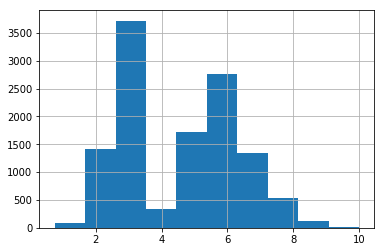

In [17]:
#Figura 1: Histograma das notas
base['nota'].hist();

Observando o histograma de notas, percebe-se que ela tem um comportamento bimodal, onde um pico está em 3 e o outro em aproximadamente 6. Esses valores correspondem aos quartis 1 e 3 apresentado na tabela de descrição estatística acima. Ou seja, apagar os valores faltantes não alteraram a distribuição dos dados.

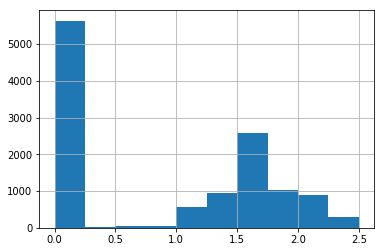

In [18]:
#Figura 2: Histograma das notas da redação
base['nota_redacao'].hist();

Os picos das distribuições do histograma referentes as notas de redação apresentam os quartis 1 e 3 mostrados na tabela da descrição estatística acima. Na verdade, não dá para dizer que a coluna a esquerda é uma distribuição. Ela praticamente representa apenas o valor 0.

# Público-alvo ideal (Aprovados)

Para entender melhor o público-alvo a base de dados passará por um filtro, no qual serão retirados os alunos reprovados.

In [19]:
aprovados = base.query("nota >= 5 and nota_redacao > 0")

In [20]:
aprovados.head()

,Unnamed: 0,prova_realizada_em,dia_da_prova_realizada,nota,nota_redacao,horario_da_prova,sexo,estado_civil,escolaridade,cidade_de_nascimento,bairro
0,0,GO - Goiás,13/01/2017,7.45,2.2,manhã,Masculino,Casado(a),Ensino médio,fortaleza,Asa Sul
1,1,GO - Goiás,10/01/2017,7.40,2.4,manhã,Masculino,Casado(a),Especialização,Recife,Norte (Águas Claras)
2,2,GO - Goiás,07/01/2017,7.30,1.8,manhã,Masculino,Casado(a),Superior,BRASILIA,Setor Sudoeste
3,3,GO - Goiás,02/01/2017,7.20,1.7,Noite,Masculino,Solteiro(a),Ensino médio,Brasília,Setor Norte
4,4,GO - Goiás,09/01/2017,6.95,1.7,manhã,Feminino,Solteiro(a),Superior,BRASÍLIA,Guará I


Agora, cada coluna será analisada individualmente, começando com os estados, onde as provas foram realizadas.

In [21]:
print(aprovados.prova_realizada_em.value_counts())
print('\n')
print(base.prova_realizada_em.value_counts())

PA - Pará                   618
GO - Goiás                  577
RJ - Rio de Janeiro         480
MG - Minas Gerais           431
MS - Mato Grosso do Sul     416
BA - Bahia                  407
PB - Paraíba                348
MA - Maranhão               333
RR - Roraima                326
SC - Santa Catarina         320
CE - Ceará                  292
RS - Rio Grande do Sul      280
RO - Rondônia               209
TO - Tocantins              197
MT - Mato Grosso            165
PE - Pernambuco              84
RN - Rio Grande do Norte     83
SE - Sergipe                 73
AM - Amazonas                65
PI - Piauí                   60
ES - Espírito Santo          49
Name: prova_realizada_em, dtype: int64


PA - Pará                   1546
GO - Goiás                  1333
MG - Minas Gerais            898
BA - Bahia                   880
MS - Mato Grosso do Sul      837
RR - Roraima                 783
RJ - Rio de Janeiro          777
MA - Maranhão                722
PB - Paraíba           

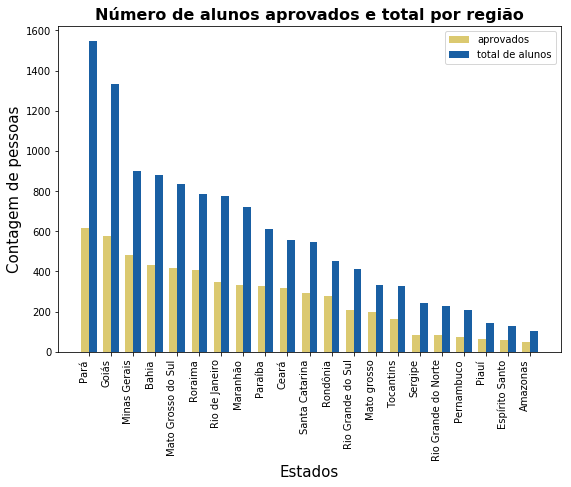

In [22]:
#Figura 3: Número de alunos aprovados e totalpor região
survivedf = [618, 577, 480, 431, 416, 407, 348, 333, 326, 320, 292, 280, 209, 197, 165, 
             84, 83, 73, 65,60, 49] # contagem de alunos aprovados
nsurvivedf = [1546, 1333, 898, 880, 837, 783, 777, 722, 609, 556, 545, 453, 411, 332, 325, 
              242, 230, 209, 141, 126, 105] # contagem total de alunos
Pclass = ['Pará', 'Goiás', 'Minas Gerais', 'Bahia', 'Mato Grosso do Sul', 'Roraima', 'Rio de Janeiro',
         'Maranhão', 'Paraíba', 'Ceará', 'Santa Catarina', 'Rondônia', 'Rio Grande do Sul',
         'Mato grosso', 'Tocantins', 'Sergipe', 'Rio Grande do Norte', 'Pernambuco', 'Piauí',
         'Espírito Santo', 'Amazonas'] # estados

pos = np.arange(21) # posições das barras
tam = .35 # distancia das barras.

fig, ax = plt.subplots(figsize=(9, 6)) 
plt1 = ax.bar(pos-tam/2, survivedf, tam, color = (0.8, 0.7, 0.2, 0.7), label = 'aprovados')
plt2 = ax.bar(pos+tam/2, nsurvivedf, tam, color = (0.0, 0.3, 0.6, 0.9), label = 'total de alunos')

ax.set_title('Número de alunos aprovados e total por região', 
             fontsize = 16, 
             fontweight = 'bold')
ax.set_xlabel('Estados', fontsize = 15)
ax.set_ylabel('Contagem de pessoas', fontsize = 15)

ax.set_xticks(pos) 

ax.set_xticklabels(Pclass, rotation = 90, ha = 'right') 
ax.legend(); 

In [23]:
#Razão de alunos aprovados por região
aprovados.prova_realizada_em.value_counts() / base.prova_realizada_em.value_counts()

AM - Amazonas               0.619048
BA - Bahia                  0.462500
CE - Ceará                  0.525180
ES - Espírito Santo         0.388889
GO - Goiás                  0.432858
MA - Maranhão               0.461219
MG - Minas Gerais           0.479955
MS - Mato Grosso do Sul     0.497013
MT - Mato Grosso            0.496988
PA - Pará                   0.399741
PB - Paraíba                0.571429
PE - Pernambuco             0.401914
PI - Piauí                  0.425532
RJ - Rio de Janeiro         0.617761
RN - Rio Grande do Norte    0.360870
RO - Rondônia               0.461369
RR - Roraima                0.416347
RS - Rio Grande do Sul      0.681265
SC - Santa Catarina         0.587156
SE - Sergipe                0.301653
TO - Tocantins              0.606154
Name: prova_realizada_em, dtype: float64

Analisando o número de aprovados por região, observa-se que o Pará teve mais alunos do que os outros lugares. Entretanto, quando é observado a taxa de aprovados, este estado apresenta apenas 0,40 (40%). De todos os estados, os 3 que tiveram o melhor índice de aprovados foram: Rio Grande do Sul (0,68), Amazonas (0,62) e Rio de Janeiro (0,62), respectivamente.

In [24]:
#média das notas de redação e notas de prova
aprovados.nota_redacao.mean(), aprovados.nota.mean()

(1.679272320660585, 6.14177017030794)

Analisando as notas médias de redação e notas de prova, lembrando da tabela de descrição estatística no começo do desse arquivo, percebe-se claramente que eles correspondem aos quartis 3, ou seja, as notas dos 25% melhores alunos.

In [25]:
#Em cima, período do dia em que os alunos aprovados fizeram a prova
#No meio, são os dados totais de alunos
#Na parte de baixo, a razão dos alunos aprovados em relação ao período do dia
print(aprovados.horario_da_prova.value_counts())
print('\n')
print(base.horario_da_prova.value_counts())
print('\n')
print(aprovados.horario_da_prova.value_counts()/base.horario_da_prova.value_counts())

Noite    3245
manhã    2568
Name: horario_da_prova, dtype: int64


Noite    6782
manhã    5278
Name: horario_da_prova, dtype: int64


Noite    0.478472
manhã    0.486548
Name: horario_da_prova, dtype: float64


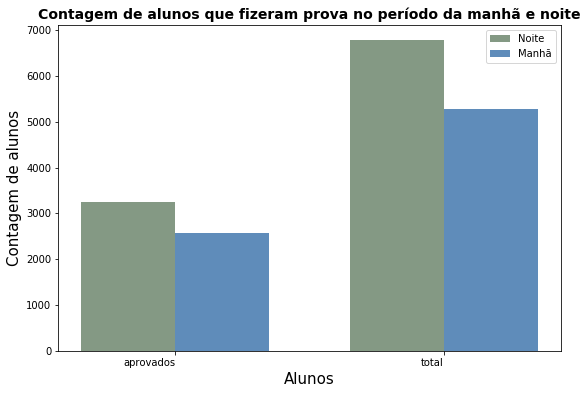

In [26]:
#Figura 4: Contagem de alunos que fizeram prova no período da manhã e noite
noite = [3245, 6782] # contagem de alunos que fizeram a prova de noite
manha = [2568, 5278] # contagem de alunos que fizeram a prova de manhã
Pclass = ['aprovados', 'total'] 

pos = np.arange(2) # posições das barras
tam = .35 # distancia das barras.

fig, ax = plt.subplots(figsize=(9,6))
plt1 = ax.bar(pos-tam/2, noite, tam, color = (0.4, 0.5, 0.4, 0.8), label = 'Noite')
plt2 = ax.bar(pos+tam/2, manha, tam, color = (0.3, 0.5, 0.7, 0.9), label = 'Manhã')

ax.set_title('Contagem de alunos que fizeram prova no período da manhã e noite', 
             fontsize = 14, 
             fontweight = 'bold')
ax.set_xlabel('Alunos', fontsize = 15)
ax.set_ylabel('Contagem de alunos', fontsize = 15)

ax.set_xticks(pos) 

ax.set_xticklabels(Pclass, rotation = 0, ha = 'right') 
ax.legend(); 

Quanto aos dados do horário da prova, pelas informações acima, observa-se que o número de alunos que fizeram as provas no período noturno, foi bem maior do que os do matutino. Entretanto, proporcionalmente, os alunos que fizeram na parte da manhã foram melhores. Enquanto, o matutino obteve 48,64% de aprovação e o noturno alcançou 47,85%. Estatisticamente essa diferença não é representativa.

In [27]:
#Em cima, número de homens e mulheres aprovados
#No meio, são os dados totais de alunos
#Na parte de baixo, porcentagem de homens e mulheres aprovados
print(aprovados.sexo.value_counts())
print('\n')
print(base.sexo.value_counts())
print('\n')
print(aprovados.sexo.value_counts()/base.sexo.value_counts())

Masculino    3503
Feminino     2310
Name: sexo, dtype: int64


Masculino    6642
Feminino     5418
Name: sexo, dtype: int64


Masculino    0.527401
Feminino     0.426357
Name: sexo, dtype: float64


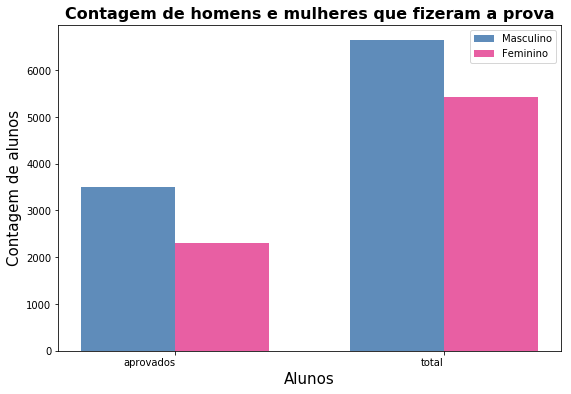

In [28]:
#Figura 5: Contagem de homens e mulheres que fizeram a prova
masculino = [3503, 6642] # contagem de homens
feminino = [2310, 5418] # contagem de mulheres 
Pclass = ['aprovados', 'total'] 

pos = np.arange(2) # posições das barras
tam = .35 # distancia das barras.

fig, ax = plt.subplots(figsize=(9, 6))
plt1 = ax.bar(pos-tam/2, masculino, tam, color=(0.3, 0.5, 0.7, 0.9), label = 'Masculino')
plt2 = ax.bar(pos+tam/2, feminino, tam, color=(0.9, 0.3, 0.6, 0.9), label = 'Feminino')

ax.set_title('Contagem de homens e mulheres que fizeram a prova', 
             fontsize = 16, 
             fontweight = 'bold')
ax.set_xlabel('Alunos', fontsize = 15)
ax.set_ylabel('Contagem de alunos', fontsize = 15)

ax.set_xticks(pos) 

ax.set_xticklabels(Pclass, rotation = 0, ha = 'right') 
ax.legend(); 

Com relação ao sexo dos alunos, numericamente os homens tiveram um melhor resultado. Porém, essa vantagem não é tão relevante a ponto de ser facilmente visualizada no gráfico acima.

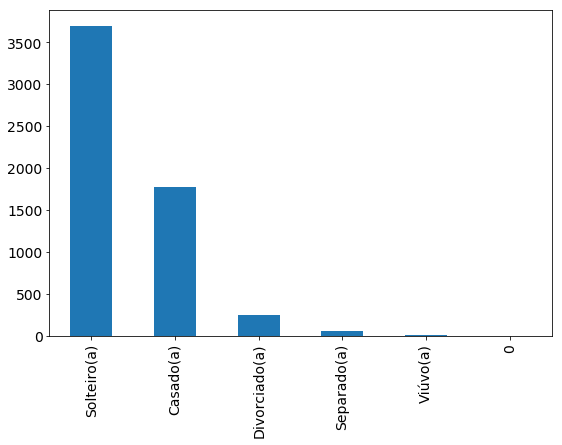

In [29]:
#Figura 6: Número de aprovados de acordo com o estado civil do candidato
aprovados.estado_civil.value_counts().plot(kind = 'bar', fontsize = 14,
                                           figsize = (9, 6));

O número de solteiros foi praticamente o dobro da soma dos outros estados civis. Uma possível causa é que esses alunos são mais jovens e estão em idade escolar. 

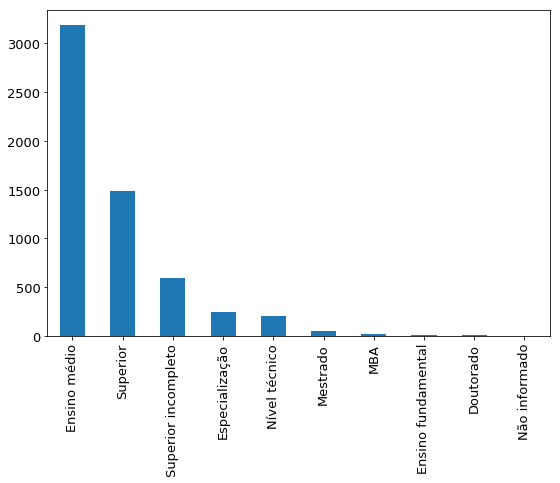

In [30]:
#Figura 7: Número de aprovados de acordo com a escolaridade
aprovados.escolaridade.value_counts().plot(kind = 'bar', fontsize = 13,
                                           figsize = (9, 6));

In [31]:
aprovados.query("escolaridade == 'Ensino médio' and estado_civil == 'Solteiro(a)'").count()

Unnamed: 0                2102
prova_realizada_em        2102
dia_da_prova_realizada    2102
nota                      2102
nota_redacao              2102
horario_da_prova          2102
sexo                      2102
estado_civil              2102
escolaridade              2102
cidade_de_nascimento      2102
bairro                    2102
dtype: int64

In [32]:
aprovados.count()

Unnamed: 0                5813
prova_realizada_em        5813
dia_da_prova_realizada    5813
nota                      5813
nota_redacao              5813
horario_da_prova          5813
sexo                      5813
estado_civil              5813
escolaridade              5813
cidade_de_nascimento      5813
bairro                    5813
dtype: int64

O gráfico de escolaridade segue o mesmo comportamento que o do estado civil. Utilizando um filtro para verificar o número de alunos solteiros do ensino médio, observa-se que eles são 2102 pessoas e o número total de aprovados é de 5813, valor bem considerável.

In [33]:
aprovados.query("estado_civil == 'Casado(a)'").count()

Unnamed: 0                1783
prova_realizada_em        1783
dia_da_prova_realizada    1783
nota                      1783
nota_redacao              1783
horario_da_prova          1783
sexo                      1783
estado_civil              1783
escolaridade              1783
cidade_de_nascimento      1783
bairro                    1783
dtype: int64

In [34]:
aprovados.query("estado_civil == 'Casado(a)' and escolaridade == 'Ensino médio'").count()

Unnamed: 0                918
prova_realizada_em        918
dia_da_prova_realizada    918
nota                      918
nota_redacao              918
horario_da_prova          918
sexo                      918
estado_civil              918
escolaridade              918
cidade_de_nascimento      918
bairro                    918
dtype: int64

In [35]:
aprovados.estado_civil.value_counts() / base.estado_civil.value_counts()

Solteiro(a)      0.461462
Casado(a)        0.518766
Divorciado(a)    0.568493
Separado(a)      0.457364
Viúvo(a)         0.600000
0                0.333333
Name: estado_civil, dtype: float64

In [36]:
base.query("estado_civil == 'Viúvo(a)'").count()

Unnamed: 0                35
prova_realizada_em        35
dia_da_prova_realizada    35
nota                      35
nota_redacao              35
horario_da_prova          35
sexo                      35
estado_civil              35
escolaridade              35
cidade_de_nascimento      35
bairro                    35
dtype: int64

In [37]:
aprovados.query("estado_civil == 'Divorciado(a)'").count()

Unnamed: 0                249
prova_realizada_em        249
dia_da_prova_realizada    249
nota                      249
nota_redacao              249
horario_da_prova          249
sexo                      249
estado_civil              249
escolaridade              249
cidade_de_nascimento      249
bairro                    249
dtype: int64

In [38]:
base.query("estado_civil == 'Divorciado(a)'").count()

Unnamed: 0                438
prova_realizada_em        438
dia_da_prova_realizada    438
nota                      438
nota_redacao              438
horario_da_prova          438
sexo                      438
estado_civil              438
escolaridade              438
cidade_de_nascimento      438
bairro                    438
dtype: int64

Os casados e aprovados correspondem a 1783 alunos, sendo que desse número 918 são do ensino médio. Considerando os solteiros mais os casados com escolaridade de ensino médio, temos um total de 3020 pessoas, esse valor representa mais da metade dos alunos aprovados. Entretanto, os viúvos(a) foram os mais eficientes. Dos 35 que prestaram as provas, 21 foram aprovados, dessa forma eles atingiram a marca de 60% de aprovação. Logo em seguida aparecem os Divorciados com 57% de aprovação, mas dessa vez o número foi bem mais considerável, de 438 que fizeram as provas, 249 foram aprovados.

In [39]:
aprovados['cidade_de_nascimento'].value_counts()

Belo Horizonte                 54
Fortaleza                      44
BOA VISTA                      42
Rio de Janeiro                 41
Belém                          40
Goiânia                        39
Salvador                       38
BELO HORIZONTE                 37
IMPERATRIZ                     36
Balsas                         36
Imperatriz                     36
FORTALEZA                      36
Boa Vista                      35
Capanema                       30
Campo Grande                   30
João Pessoa                    29
Campina Grande                 29
São Sepé                       29
Barra Mansa                    26
Cruz Alta                      25
SALVADOR                       25
São Paulo                      24
boa vista                      24
CAMPO GRANDE                   24
Volta Redonda                  24
CRUZ ALTA                      22
Quixeramobim                   21
Paragominas                    21
Boa vista                      21
Manaus        

In [40]:
aprovados.bairro.value_counts()

Centro                           1168
Setor Central                     131
ZONA RURAL                         76
Zona Rural                         68
CENTRO                             46
zona rural                         43
centro                             35
Cidade Nova                        26
São José                           25
Santo Antônio                      24
interior                           21
Plano Diretor Sul                  20
Jardim América                     19
INTERIOR                           18
Promissão II                       16
Interior                           16
Zona rural                         16
Vila Nova                          14
Rural                              14
Plano Diretor Norte                13
São Francisco                      12
São Cristóvão                      12
Alvorada                           12
Bela Vista                         12
Liberdade                          11
Cidade Satélite                    11
Santo Agosti

Os dados da cidade de nascimento, dependendo de como forem usados, podem fornecer um grande viés, pois uma pessoa que nasceu numa cidade, pode se mudar e ir estudar em outro lugar. A não ser que a base de dados seja muito grande, até mesmo para treinar os algoritmos de machine learning pode ser um problema, porque uma pessoa dificilmente irá seguir os mesmos caminhos que uma outra.

In [41]:
aprovados.escolaridade.value_counts() / base.escolaridade.value_counts()

Doutorado              0.727273
Ensino fundamental     0.270270
Ensino médio           0.414197
Especialização         0.684358
MBA                    0.840000
Mestrado               0.750000
Não informado          0.571429
Nível técnico          0.494062
Superior               0.617842
Superior incompleto    0.573230
Name: escolaridade, dtype: float64

Observando a razão entre a escolaridade dos aprovados, percebe-se que os que possuem MBA, Mestrado, Doutorado e especialização foram melhores proporcionalmente.

De uma forma geral, todas as regiões tiveram aprovações, entretanto, os estados do Rio Grande do Sul, Amazonas e Rio de Janeiro apresentaram um destaque nesse quesito. Eles foram os mais aprovados proporcionalmente ao número de candidatos que prestaram a prova.

Alunos que fizeram a prova no período da manhã, tiveram uma leve vantagem sobre os que fizeram no noturno. Uma outra pequena vantagem foi a do sexo masculino sobre o feminino, porém tal vantagem foi tão baixa que não é facilmente observada no gráfico correspondente.

Uma informação importante é de que os alunos do ensino médio (solteiros(a) e casados(a)) tiveram um maior número de pessoas em relação as outras categorias, correspondendo a um pouco mais de 50% dos aprovados, entretanto, não necessariamente que eles tenham tido uma maior eficiência já que, proporcionalmente ao grau de escolaridade dos alunos que prestaram a prova, os que possuíam um maior grau de escolaridade (MBA, mestrado, doutorado e especialização) foram os que obtiveram mais aprovações.

Esses resultados seriam um primeiro informe ao grupo de marketing.

# Treinamento dos algoritmos de machine learning com a base de dados dos alunos

Nesta parte, será feito o treinamento de alguns algoritmos para preverem se um aluno com certas características seria aprovado ou reprovado. Para evitar algum conflito com os dados analisados anteriormente, o tratamento de dados será feito desde o início.

In [42]:
df = pd.read_csv('DOT_teste_data_science.csv', encoding = "ISO-8859-1", decimal = ',')

In [43]:
df.head()

,Unnamed: 0,prova_realizada_em,dia_da_prova_realizada,nota,nota_redacao,horario_da_prova,sexo,estado_civil,escolaridade,cidade_de_nascimento,bairro
0,0,GO - Goiás,13/01/2017,7.45,2.2,manhã,Masculino,Casado(a),Ensino médio,fortaleza,Asa Sul
1,1,GO - Goiás,10/01/2017,7.40,2.4,manhã,Masculino,Casado(a),Especialização,Recife,Norte (Águas Claras)
2,2,GO - Goiás,07/01/2017,7.30,1.8,manhã,Masculino,Casado(a),Superior,BRASILIA,Setor Sudoeste
3,3,GO - Goiás,02/01/2017,7.20,1.7,Noite,Masculino,Solteiro(a),Ensino médio,Brasília,Setor Norte
4,4,GO - Goiás,09/01/2017,6.95,1.7,manhã,Feminino,Solteiro(a),Superior,BRASÍLIA,Guará I


Inicialmente, será dividida a coluna dia_da_prova_realizada em dia, mês e ano.

In [44]:
df[['dia','mes','ano']] = df.dia_da_prova_realizada.str.split("/", expand = True) 

Colunas que não trazem informações relevantes serão apagadas. A coluna dia não informa nada sem estar unida com as colunas mês e ano; e a coluna ano será apagada para que os anos anteriores não influam nas previsões. A coluna mês permanecerá, pois a metade e fim do ano são duas épocas marcantes para a realização de provas. As colunas bairro e cidade_de_nascimento podem gerar viés, pois são muito específicas de cada aluno, como explicado anteriormente.

In [45]:
df.drop('dia_da_prova_realizada', axis = 1, inplace = True)
df.drop('dia', axis = 1, inplace = True)
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.drop('bairro',axis = 1, inplace = True)
df.drop('cidade_de_nascimento', axis = 1, inplace = True)
df.drop('ano', axis = 1, inplace = True)

Como existem duas variáveis para que o aluno seja aprovado (nota da prova e nota da redação), uma nova coluna na tabela de dados será criada. Ela será uma coluna de desempenho do aluno, ou seja, caso ele tenha tirado nota maior ou igual a 5 e nota de redação maior do que 0 ele será aprovado, caso contrário será reprovado.

In [46]:
pass_col = []
for _, row in df.iterrows():
  if row['nota'] >= 5 and row['nota_redacao'] > 0:
    pass_col.append('aprovado')
  else:
    pass_col.append('reprovado')
    
df['desempenho'] = pd.Series(pass_col)

In [47]:
#Excluindo as linhas com NAN
df.dropna(inplace = True)

In [48]:
ap = df.query("desempenho == 'aprovado'")
#ap.nota.value_counts()

As previsões serão feitas com base numa classificação binária, ou seja, ou o aluno é aprovado ou reprovado. As colunas nota e nota_redação serão apagadas, pois a nova coluna já possui a informação delas em conjunto.

In [49]:
df.drop('nota', axis = 1, inplace = True)
df.drop('nota_redacao', axis = 1, inplace = True)

Agora os dados serão divididos em previsores e classe, onde os previsores serão todas as características dos alunos e a classe é o resultado do aluno.

In [50]:
previsores = df.iloc[:, 0:6].values 
classe = df.iloc[:, 6].values 

Como muitas variáveis são categóricas, é necessário transformá-las em numéricas para que os algorítmos consigam entendê-las.

In [51]:
labelencoder_previsores = LabelEncoder()

previsores[:, 0] = labelencoder_previsores.fit_transform(previsores[:, 0])
previsores[:, 1] = labelencoder_previsores.fit_transform(previsores[:, 1])
previsores[:, 2] = labelencoder_previsores.fit_transform(previsores[:, 2])
previsores[:, 3] = labelencoder_previsores.fit_transform(previsores[:, 3])
previsores[:, 4] = labelencoder_previsores.fit_transform(previsores[:, 4])
previsores[:, 5] = labelencoder_previsores.fit_transform(previsores[:, 5])

In [52]:
labelencoder_classe = LabelEncoder()
classe = labelencoder_classe.fit_transform(classe)

Agora que as variáveis estão transformadas em numéricas, a etapa seguinte é o escalonamento delas. Essa etapa consistem em fazer com que todas as colunas tenham a mesma escala.

In [53]:
scaler = StandardScaler()

previsores = scaler.fit_transform(previsores)

/home/wagner/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/wagner/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [54]:
previsores

array([[-0.93005903,  1.13355918,  0.90317117, -1.51680658, -0.70207394,
        -0.7701076 ],
       [-0.93005903,  1.13355918,  0.90317117, -1.51680658, -0.35453826,
        -0.7701076 ],
       [-0.93005903,  1.13355918,  0.90317117, -1.51680658,  1.38314012,
        -0.7701076 ],
       ...,
       [ 0.71114156,  1.13355918, -1.10720984, -1.51680658, -0.70207394,
        -0.7701076 ],
       [ 0.71114156,  1.13355918, -1.10720984, -1.51680658, -0.70207394,
         1.35517791],
       [ 0.71114156,  1.13355918,  0.90317117, -1.51680658, -0.70207394,
         1.35517791]])

Nesta fase, a base de dados será dividida em duas partes: uma para treinamento dos algorítmos e outra para testá-los. A separação consistirá em 80% para treinamento e 20% para teste.

In [55]:
previsores_treinamento, previsores_teste, classe_treinamento, classe_teste = train_test_split(
    previsores, classe, test_size = 0.20, random_state = 0)

Os algorítmos a serem testados são: NaiveBayes, árvore de decisão, random forest, K-Nearest Neighbors (KNN), Multi-Layer Perceptron (MLP) e Support Vector Machine (SVM).

In [56]:
# Naive Bayes
classificador_nb = GaussianNB()
classificador_nb.fit(previsores_treinamento, classe_treinamento)
previsoes_nb = classificador_nb.predict(previsores_teste)

#acurácia do modelo
precisao_nb = accuracy_score(classe_teste, previsoes_nb)

precisao_nb

0.6260364842454395

In [57]:
# Árvore de decisão
classificador_dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classificador_dt.fit(previsores_treinamento, classe_treinamento)
previsoes_dt = classificador_dt.predict(previsores_teste)

# Acurácia do modelo
precisao_dt = accuracy_score(classe_teste, previsoes_dt)

precisao_dt

0.6268656716417911

In [58]:
#Random Forest ou Floresta randômica
classificador_rf = RandomForestClassifier(n_estimators = 40, criterion = 'entropy', 
                                          random_state = 0)
classificador_rf.fit(previsores_treinamento, classe_treinamento)
previsoes_rf = classificador_rf.predict(previsores_teste)

#acurácia do modelo
precisao_rf = accuracy_score(classe_teste, previsoes_rf)

precisao_rf

0.6272802653399668

In [59]:
#KNN
classificador_knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski', p = 2)
classificador_knn.fit(previsores_treinamento, classe_treinamento)
previsoes_knn = classificador_knn.predict(previsores_teste)

#Acurácia do modelo
precisao_knn = accuracy_score(classe_teste, previsoes_knn)

precisao_knn

0.5978441127694859

In [60]:
#MLP
classificador_rn = MLPClassifier(verbose = True, max_iter = 500, tol = 0.00001)
classificador_rn.fit(previsores_treinamento, classe_treinamento)
previsoes_rn = classificador_rn.predict(previsores_teste)

#Acurácia do modelo
precisao_rn = accuracy_score(classe_teste, previsoes_rn)

precisao_rn

Iteration 1, loss = 0.67094151
Iteration 2, loss = 0.64659872
Iteration 3, loss = 0.64412991
Iteration 4, loss = 0.64307650
Iteration 5, loss = 0.64204379
Iteration 6, loss = 0.64220690
Iteration 7, loss = 0.64093482
Iteration 8, loss = 0.64062056
Iteration 9, loss = 0.64032211
Iteration 10, loss = 0.64001463
Iteration 11, loss = 0.64007443
Iteration 12, loss = 0.63957420
Iteration 13, loss = 0.63945273
Iteration 14, loss = 0.63956042
Iteration 15, loss = 0.63933762
Iteration 16, loss = 0.63878201
Iteration 17, loss = 0.63884911
Iteration 18, loss = 0.63897434
Iteration 19, loss = 0.63836421
Iteration 20, loss = 0.63901816
Iteration 21, loss = 0.63868601
Iteration 22, loss = 0.63823816
Iteration 23, loss = 0.63825131
Iteration 24, loss = 0.63812922
Iteration 25, loss = 0.63780084
Iteration 26, loss = 0.63796339
Iteration 27, loss = 0.63808038
Iteration 28, loss = 0.63753718
Iteration 29, loss = 0.63798834
Iteration 30, loss = 0.63750338
Iteration 31, loss = 0.63748632
Iteration 32, los

0.6351575456053068

In [61]:
#SVM
classificador_svm = SVC(kernel = 'linear', random_state = 1)
classificador_svm.fit(previsores_treinamento, classe_treinamento)
previsoes_svm = classificador_svm.predict(previsores_teste)

#Acurácia do modelo
precisao_svm = accuracy_score(classe_teste, previsoes_svm)

precisao_svm

0.6148424543946932

In [62]:
# Precisão dos modelos
print('Naive Bayes: ', precisao_nb)
print('Árvore de decisão: ', precisao_dt)
print('Random Forest: ', precisao_rf)
print('KNN: ', precisao_knn)
print('MLP: ', precisao_rn)
print('SVM: ', precisao_svm)

Naive Bayes:  0.6260364842454395
Árvore de decisão:  0.6268656716417911
Random Forest:  0.6272802653399668
KNN:  0.5978441127694859
MLP:  0.6351575456053068
SVM:  0.6148424543946932


Comparando a precisão dos modelos, observa-se que eles não se adaptaram bem aos algorítmos. Todos apresentaram uma taxa de acerto em torno de 62%, com exceção do KNN. Antes desses resultados muitos testes modificando as configurações da tabela e do modelo foram feitos, por exemplo, utilizando todas as colunas da base de dados, variáveis do tipo Dummy e variações no escalonamento. Mesmo com todos os esforços, estes foram os melhores valores obtidos. Dentre os 6 modelos, em geral, o KNN foi o que se adaptou menos aos dados, desta forma, ele será descartado. Para aumentar a confiabilidade dos modelos, os resultados serão utilizados em conjunto. Caso 3 ou mais modelos apresentem o mesmo resultado, então ele será a resposta final. Para isso, será feito um pequeno script logo abaixo. 

In [63]:
# Exemplo da aluna:
# 4 - Goiás
# 1 - manhã
# 0 - Feminino
# 4 - Solteira
# 8 - Superior
# 0 - mês 01

novo =[[4, 1, 0, 4, 8, 0]]
novo = np.asarray(novo)
novo = novo.reshape(-1, 1)
novo = scaler.fit_transform(novo)
novo = novo.reshape(-1, 6)

/home/wagner/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/wagner/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [64]:
a =classificador_nb.predict(novo)
b= classificador_dt.predict(novo)
c = classificador_rf.predict(novo)
d = classificador_svm.predict(novo)
e = classificador_rn.predict(novo)

aprovado = 0
reprovado = 0

if a == 0:
    aprovado += 1
else:
    reprovado += 1
    
if b == 0:
    aprovado += 1
else:
    reprovado += 1
    
if c == 0:
    aprovado += 1
else:
    reprovado += 1

if d == 0:
    aprovado += 1
else:
    reprovado += 1
    
if e == 0:
    aprovado += 1
else:
    reprovado += 1
    
if aprovado > reprovado:
    print("Aprovado")
else:
    print('Reprovado')

Aprovado


O exemplo acima mostrou que o algoritmo previu que a aluna com essas características passou no teste e foi aprovada. Agora serão mostradas as características de um aluno reprovado.

In [65]:
# Exemplo da aluno:
# 17 - Rio Grande do Norte
# 0 - Noite
# 1 - Masculino
# 3 - Separado
# 1 - Ensino fundamental
# 2 - mês 08

novo_aluno =[[17, 0, 1, 3, 1, 2]]
novo_aluno = np.asarray(novo_aluno)
novo_aluno = novo_aluno.reshape(-1, 1)
novo_aluno = scaler.fit_transform(novo_aluno)
novo_aluno = novo_aluno.reshape(-1, 6)

/home/wagner/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/wagner/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [66]:
a =classificador_nb.predict(novo_aluno)
b= classificador_dt.predict(novo_aluno)
c = classificador_rf.predict(novo_aluno)
d = classificador_svm.predict(novo_aluno)
e = classificador_rn.predict(novo_aluno)

aprovado = 0
reprovado = 0

if a == 0:
    aprovado += 1
else:
    reprovado += 1
    
if b == 0:
    aprovado += 1
else:
    reprovado += 1
    
if c == 0:
    aprovado += 1
else:
    reprovado += 1

if d == 0:
    aprovado += 1
else:
    reprovado += 1
    
if e == 0:
    aprovado += 1
else:
    reprovado += 1
    
if aprovado > reprovado:
    print("Aprovado")
else:
    print('Reprovado')

Reprovado


Trabalhando separadamente os algorítmos, eles conseguem uma eficiência de aproximadamente 62%, utilizando-os em conjunto com o índice de acerto, aumenta-se um pouco mais, podendo chegar próximo a 70%.

Com relação aos alunos que mais necessitam de ajuda, pode-se considerar que eles são os reprovados, desta forma, será feito um novo filtro para verificar as características desses alunos.

In [67]:
reprovados = base.query("nota < 5 or nota_redacao == 0")
reprovados.head()

,Unnamed: 0,prova_realizada_em,dia_da_prova_realizada,nota,nota_redacao,horario_da_prova,sexo,estado_civil,escolaridade,cidade_de_nascimento,bairro
39,39,GO - Goiás,17/01/2017,4.95,1.2,manhã,Masculino,Casado(a),Ensino médio,BRASILIA,Valparaiso II
40,40,GO - Goiás,05/01/2017,4.85,1.1,manhã,Feminino,Solteiro(a),Superior,Alexânia,Centro
138,138,MG - Minas Gerais,15/01/2017,4.95,1.2,Noite,Feminino,Solteiro(a),Superior,FORMIGA,SANTO ANTÔNIO
139,139,MG - Minas Gerais,16/01/2017,4.95,1.2,manhã,Feminino,Solteiro(a),Superior,Belo Horizonte,Estâncias Imperiais
140,140,MG - Minas Gerais,10/01/2017,4.95,1.2,manhã,Feminino,Divorciado(a),Superior incompleto,são paulo,Jardim Flórida


In [68]:
reprovados.prova_realizada_em.value_counts() / base.prova_realizada_em.value_counts()

AM - Amazonas               0.380952
BA - Bahia                  0.537500
CE - Ceará                  0.474820
ES - Espírito Santo         0.611111
GO - Goiás                  0.567142
MA - Maranhão               0.538781
MG - Minas Gerais           0.520045
MS - Mato Grosso do Sul     0.502987
MT - Mato Grosso            0.503012
PA - Pará                   0.600259
PB - Paraíba                0.428571
PE - Pernambuco             0.598086
PI - Piauí                  0.574468
RJ - Rio de Janeiro         0.382239
RN - Rio Grande do Norte    0.639130
RO - Rondônia               0.538631
RR - Roraima                0.583653
RS - Rio Grande do Sul      0.318735
SC - Santa Catarina         0.412844
SE - Sergipe                0.698347
TO - Tocantins              0.393846
Name: prova_realizada_em, dtype: float64

In [69]:
reprovados.escolaridade.value_counts() / base.escolaridade.value_counts()

Doutorado              0.272727
Ensino fundamental     0.729730
Ensino médio           0.585803
Especialização         0.315642
MBA                    0.160000
Mestrado               0.250000
Não informado          0.428571
Nível técnico          0.505938
Superior               0.382158
Superior incompleto    0.426770
Name: escolaridade, dtype: float64

In [70]:
reprovados.estado_civil.value_counts() / base.estado_civil.value_counts()

Solteiro(a)      0.538538
Casado(a)        0.481234
Divorciado(a)    0.431507
Separado(a)      0.542636
Viúvo(a)         0.400000
0                0.666667
Name: estado_civil, dtype: float64

In [71]:
base.query("estado_civil == '0'")

,Unnamed: 0,prova_realizada_em,dia_da_prova_realizada,nota,nota_redacao,horario_da_prova,sexo,estado_civil,escolaridade,cidade_de_nascimento,bairro
3060,3060,PA - Pará,13/01/2017,2.75,0.0,Noite,Feminino,0,Ensino médio,Santa Izabel do Pará,Centro
4258,4258,RN - Rio Grande do Norte,16/01/2017,5.20,1.7,manhã,Masculino,0,Superior incompleto,Natal,Nova Parnamirim
6734,6734,GO - Goiás,13/01/2017,2.50,0.0,manhã,Masculino,0,Ensino médio,goiania,Setor dos Funcionários


Dos alunos reprovados, proporcionalmente o estado do Sergipe foi o pior entre todos os estados, chegando a reprovar quase 70% dos alunos. Um pouco depois aparece o Rio Grande do Norte com 64% de reprovação. 

Em relação a escolaridade dos alunos, os que possuem pior índice foram os da educação básica, sendo que os do ensino fundamental reprovaram em 73%, enquanto que os do nível médio ficaram em 59%.

Com relação ao estado civil, os que tinham o valor 0 atribuído aos seus dados, tiveram uma proporção maior de reprovações, porém só existiam 3 alunos nesse caso, logo o resultado não traz muita informação. Os solteiros e os separados foram os que mais reprovaram passando do valor de 50%.

Para ajudar o time de monitoria, de acordo com os dados, pode-se dizer que os alunos com menor grau de escolaridade, os solteiros e os separados são os mais problemáticos. Uma região que deve ter esforços redobrados para melhorar o seu índice de aprovação é o estado do Sergipe, onde apenas 30% dos alunos que prestaram a prova passaram.

Para prever se alunos com certas características serão aprovados ou não, quatro novos registros serão inseridos nos algorítmos treinados, são eles:
    
   - o aluno de Sergipe, que fará prova de manhã, do sexo masculino, solteiro, com ensino médio e fará a prova em janeiro. 
   - o aluno do Amazonas, que fará a prova de manhã, do sexo masculino, viúvo, com MBA e fará a prova em dezembro.
   - a aluna de Piauí, que fará a prova de noite, do sexo feminino, casada, superior incompleto e que fará a prova em dezembro.
   - a aluna de Minas Gerais, que fará a prova de noite, do sexo feminino, separada, com nível técnico e que fará a prova em dezembro.
   
OBS: As análises serão feitas uma por vez agora. Por exemplo, para o aluno 1 ser analisado, é necessário inserir as informações no atributo 'novo', rodar o código do primeiro aluno e depois rodar o "Código para previsão do desempenho do aluno". Para o aluno 2 é necessário repetir o processo, primeiro colocando as informações no atributo 'novo', rodar o código e em seguida rodar o "Código para previsão do desempenho do aluno", e assim para todos os novos dados que queiram analisar. Os valores de cada característica se encontram no apêndice no final deste documento. Caso seja necessário, no futuro transformarei em uma função para facilitar a inserção dos novos registros.

In [72]:
# Primeiro aluno:
# 19 - Sergipe
# 1 - manhã
# 1 - Masculino
# 4 - Solteiro
# 2 - Ensino médio
# 0 - mês 01

novo =[[19, 1, 1, 4, 2, 0]]
novo = np.asarray(novo)
novo = novo.reshape(-1, 1)
novo = scaler.fit_transform(novo)
novo = novo.reshape(-1, 6)

/home/wagner/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/wagner/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
# Segundo aluno:
# 0 - Amazonas
# 1 - manhã
# 1 - Masculino
# 5 - Viúvo
# 4 - MBA
# 3 - mês 12

novo =[[0, 1, 1, 3, 4, 3]]
novo = np.asarray(novo)
novo = novo.reshape(-1, 1)
novo = scaler.fit_transform(novo)
novo = novo.reshape(-1, 6)

In [ ]:
# Terceiro aluno:
# 12 - Piauí
# 0 - Noite
# 0 - Feminino
# 4 - Solteira
# 9 - Superior incompleto
# 3 - mês 12

novo =[[12, 0, 0, 4, 9, 3]]
novo = np.asarray(novo)
novo = novo.reshape(-1, 1)
novo = scaler.fit_transform(novo)
novo = novo.reshape(-1, 6)

In [ ]:
# Quarto aluno:
# 6 - Minas Gerais
# 0 - Noite
# 0 - Feminino
# 3 - Separada
# 7 - nível técnico
# 3 - mês 12

novo =[[12, 0, 0, 1, 9, 3]]
novo = np.asarray(novo)
novo = novo.reshape(-1, 1)
novo = scaler.fit_transform(novo)
novo = novo.reshape(-1, 6)

In [73]:
# Código para previsão do desempenho do aluno
a =classificador_nb.predict(novo)
b= classificador_dt.predict(novo)
c = classificador_rf.predict(novo)
d = classificador_svm.predict(novo)
e = classificador_rn.predict(novo)

aprovado = 0
reprovado = 0

if a == 0:
    aprovado += 1
else:
    reprovado += 1
    
if b == 0:
    aprovado += 1
else:
    reprovado += 1
    
if c == 0:
    aprovado += 1
else:
    reprovado += 1

if d == 0:
    aprovado += 1
else:
    reprovado += 1
    
if e == 0:
    aprovado += 1
else:
    reprovado += 1
    
if aprovado > reprovado:
    print("Aprovado")
else:
    print('Reprovado')

Reprovado


O resultado foi:
   
   - primeiro aluno: reprovado
   - segundo aluno: aprovado
   - terceiro aluno: reprovado
   - quarto aluno: aprovado
    
Dos quatros alunos, três possuem a chance de serem aprovados e um reprovado. Este último é de Sergipe, solteiro e do ensino médio, características que representam risco de reprovação, como discutado acima.

# Respondendo as perguntas
As respostas daqui são apenas um resumo de tudo o que foi analisado com exceção da questão 3.

## Questão 1 - Quais as características principais do público-alvo?
Os alunos que possuem maiores chances de ir bem nas provas são os com maior nível de escolaridade (MBA, mestrado, doutorado e especialização). Eles foram os que tiveram mais aprovações proporcionalmente ao número de alunos com o mesmo nível que prestaram as provas. Foi visto também que as regiões do Rio Grande do Sul, Amazonas e Rio de Janeiro alcançaram o maior número de alunos aprovados, proporcionalmente a todos os alunos que prestaram de suas regiões. E, por fim, as pessoas com estado civil viúvo(a) e divorciado(a) foram os que tiveram o melhor índice de aprovação, sendo que o índice é a taxa de alunos aprovados em relação aos que prestaram as provas do mesmo estado civil. O horário da realização das provas e o sexo dos alunos não foram um fator decisivo para irem bem ou não.

## Questão 2 - Como você pode indicar quais são os alunos que necessitam de mais ajuda?
Partindo do princípio que o aluno reprovado é o que precisa de ajuda, um jeito feito nesse trabalho para prever essa condição foi com o treinamento de algorítmos que, através de características do aluno, pudessem prever se ele será aprovado ou reprovado. Foi observado que as características que mais alteram os resultados dos algorítmos são: Local de realização da prova, escolaridade e estado civil. Variando esses 3 atributos, é possível prever o desempenho do aluno e, caso seja reprovado, indica a necessidade de ajuda. Porém vale considerar que ele não tem 100% de precisão. 

Depois da previsão utilizando o algorítmo é necessário observar as condições desse aluno e comparar com a análise feita mais acima. Como por exemplo, as pessoas com os piores índices são as com menores grau escolaridade, os solteiros e os separados. A região mais crítica é Sergipe, no qual obteve 70% de reprovações. Um exemplo claro de aluno que reprova foi o primeiro aluno testado no algorítmo, no qual suas características principais eram: ter feito a prova em Sergipe, ser solteiro e nível de escolaridade ensino médio. Observando essas características e toda a análise feita, pessoalmente, eu diria que os que mais necessitam de ajuda são os 25% piores alunos, que como visto mais acima, são os que tiram notas 3 ou menos e zero na redação. A nota zero da redação será melhor discutida na questão 3.

In [74]:
redacao_reprovados = base.query("nota_redacao == 0")
redacao_reprovados.count()

Unnamed: 0                5635
prova_realizada_em        5635
dia_da_prova_realizada    5635
nota                      5635
nota_redacao              5635
horario_da_prova          5635
sexo                      5635
estado_civil              5635
escolaridade              5635
cidade_de_nascimento      5635
bairro                    5635
dtype: int64

In [75]:
redacao_reprovados['estado_civil'].value_counts()

Solteiro(a)      3915
Casado(a)        1464
Divorciado(a)     177
Separado(a)        66
Viúvo(a)           11
0                   2
Name: estado_civil, dtype: int64

In [76]:
redacao_reprovados['escolaridade'].value_counts()

Ensino médio           4074
Superior                814
Superior incompleto     391
Nível técnico           200
Especialização          104
Ensino fundamental       26
Mestrado                 16
MBA                       4
Doutorado                 3
Não informado             3
Name: escolaridade, dtype: int64

## Questão 3 - Qual outro insght ou informação você consegue extrair dos dados?

Analisando os dados das pessoas que tiraram zero na prova de redação, observou-se que dos 12060 alunos analisados, 5630 tiraram zero na redação. Esse valor é assustador, pois é quase a metade de todos os alunos que fizeram a prova. O melhor insight que foi extraído dos dados, é de que falta informação para concluir algo sobre essas notas. Em outras palavras, considerando que qualquer texto simples que o aluno faça a sua nota será acima de zero, seria impossível reprovar nessa prova, em especial, alunos de MBA, mestrado e doutorado. Como é possível ver nos dados logo acima, 3 pessoas com escolaridade Doutorado, 4 de MBA e 16 de Mestrado reprovaram. Sendo assim, uma possibilidade é de que eles não fizeram a redação, caso isso seja verdade, seria interessante que esse dado apareça na base de dados. Isso ajudaria a saber que se alguém realmente tirar zero, é porque não sabe escrever e daí o time de monitoria de educação poderia entrar em ação para minimizar esse resultado negativo.


# Apêndice
Aqui estão os dados numéricos para se fazer previsões dos desempenhos de alunos.

Codigo local da prova realizada:

    0 - AM - Amazonas
    1 - BA - Bahia
    2 - CE - Ceará
    3 - ES - Espírito Santo
    4 - Go - Góias
    5 - MA - Maranhão
    6 - MG- Minas Gerais
    7 - MS - Mato Grosso do Sul
    8 - MT - Mato Grosso
    9 - PA - Pará
    10 - PB - Paraíba
    11 - PE - Pernambuco
    12 - PI - Piauí
    13 - RJ - Rio de Janeiro
    14 - RN - Rio Grande do norte
    15 - RO - Rondônia
    16 - RR - Roraima
    17 - RS - Rio Grande do Sul
    18 - SC - Santa Catarina
    19 - SE - Sergipe
    20 - TO - Tocantins
################################

Código do horário da prova:
    
    0 - Noite
    1 - manhã 
###############################    
Código do sexo:

    0 - Feminino
    1 - Masculino
################################    
Código do estado civil:

    0 - 0
    1 - Casado(a)
    2 - Divorciado(a)
    3 - Separado(a)
    4 - Solteiro(a)
    5 - Viúvo(a)
    
###############################    
Código da escolaridade:

    0 - Doutorado
    1 - Ensino fundamental
    2 - Ensino médio
    3 - Especialização
    4 - MBA
    5 - Mestrado
    6 - Não informado
    7 - Nível técnico
    8 - Superior
    9 - Superior incompleto
    
###############################    
Código do mês:

    0 - 01
    1 - 07
    2 - 08
    3 - 12